In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [36]:
df = pd.read_csv('data/Country-data.csv')
df.set_index("country", inplace=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [37]:
X = df.values  # Convert DataFrame to numpy array of numeric values

In [38]:
# Create a pipeline for clustering
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Step 2: K-means clustering
])

In [39]:
# Fit the pipeline to the data (use feature matrix X)
pipeline.fit(X)

# Predict cluster labels
cluster_labels = pipeline.predict(X)

c:\Users\Carlos Andres Cortes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Andres Cortes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
# Add predicted cluster labels to a copy of the DataFrame
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(df_clustered.head())

                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  Cluster  
country                                                     
Afghanistan                56.2       5.82    553        1  
Albania                    76.3       1.65   4090        2  
Algeria                    76.5       2.89   4460        2  
Angola                     60.1       6.16   3530        1  
Antigua and Barbuda        76.8       2.13  12200        2  


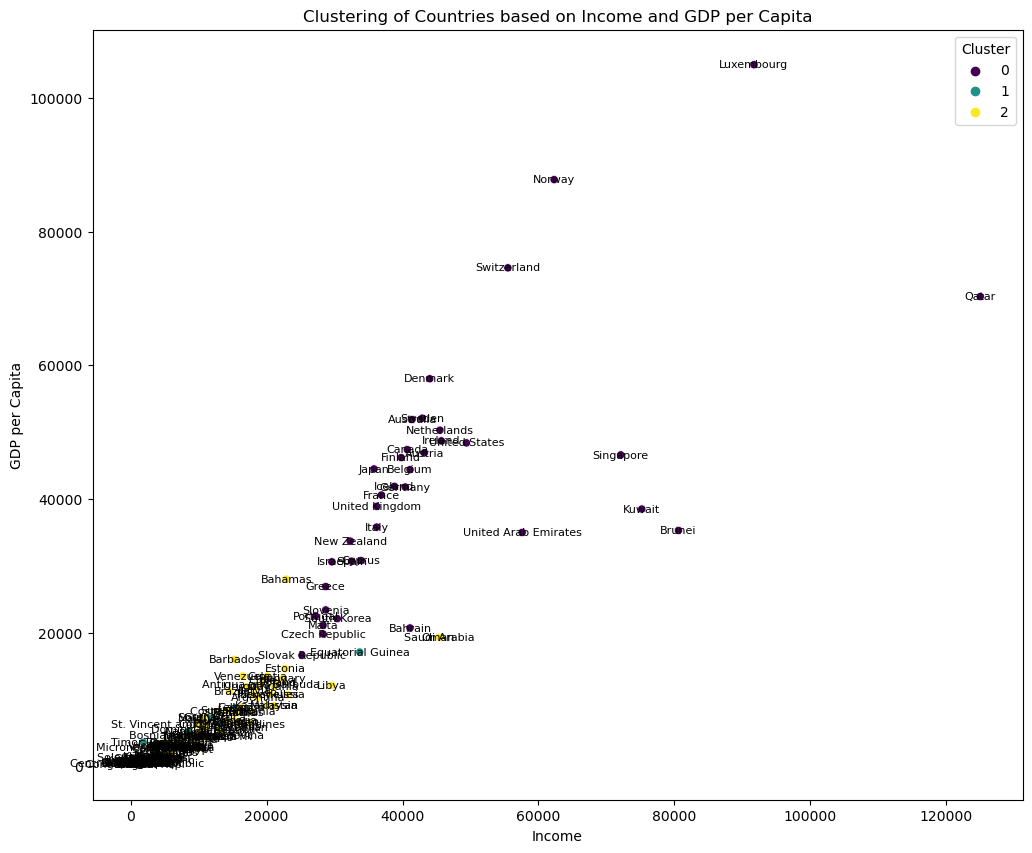

In [42]:
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(x='income', y='gdpp', hue=cluster_labels, palette='viridis', legend='full', data=df_clustered)

# Annotate each point with country name
for country, (x, y) in df_clustered[['income', 'gdpp']].iterrows():
    scatter.text(x, y, country, fontsize=8, ha='center', va='center')

plt.title('Clustering of Countries based on Income and GDP per Capita')
plt.xlabel('Income')
plt.ylabel('GDP per Capita')
plt.show()

In [43]:
for cluster_id in df_clustered['Cluster'].unique():
    cluster_countries = df_clustered[df_clustered['Cluster'] == cluster_id].index.tolist()
    print(f"Cluster {cluster_id}:")
    print(cluster_countries)
    print()

Cluster 1:
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']

Cluster 2:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyan